# Predict the age of abalone from physical measurements

We will be following the following work-flow:
1. Importing Dependencies
2. Data Loading & Pre-processing
3. Model Creation
4. Loss Function & Optimizer Setup
5. Training & Testing Loop
6. Model Evaluation

## 1. Importing Dependencies

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

RANDOM_SEED = 42

## 2. Data Loading & Pre-preocesing

In [2]:
# !pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
features = abalone.data.features
targets = abalone.data.targets

In [4]:
# Combine features and targets into a single DataFrame
df = pd.concat([features, targets], axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# Checking missing values (if exists)
print(f"Missing values in columns 'Sex': {df['Sex'].isnull().sum()}")
print(f"Missing values in columns 'Length': {df['Length'].isnull().sum()}")
print(f"Missing values in columns 'Diameter': {df['Diameter'].isnull().sum()}")
print(f"Missing values in columns 'Height': {df['Height'].isnull().sum()}")
print(f"Missing values in columns 'Whole_weight': {df['Whole_weight'].isnull().sum()}")
print(f"Missing values in columns 'Shucked_weight': {df['Shucked_weight'].isnull().sum()}")
print(f"Missing values in columns 'Viscera_weight': {df['Viscera_weight'].isnull().sum()}")
print(f"Missing values in columns 'Shell_weight': {df['Shell_weight'].isnull().sum()}")
print(f"Missing values in columns 'Rings': {df['Rings'].isnull().sum()}")

Missing values in columns 'Sex': 0
Missing values in columns 'Length': 0
Missing values in columns 'Diameter': 0
Missing values in columns 'Height': 0
Missing values in columns 'Whole_weight': 0
Missing values in columns 'Shucked_weight': 0
Missing values in columns 'Viscera_weight': 0
Missing values in columns 'Shell_weight': 0
Missing values in columns 'Rings': 0


In [6]:
# Encoding categorical data (Sex)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


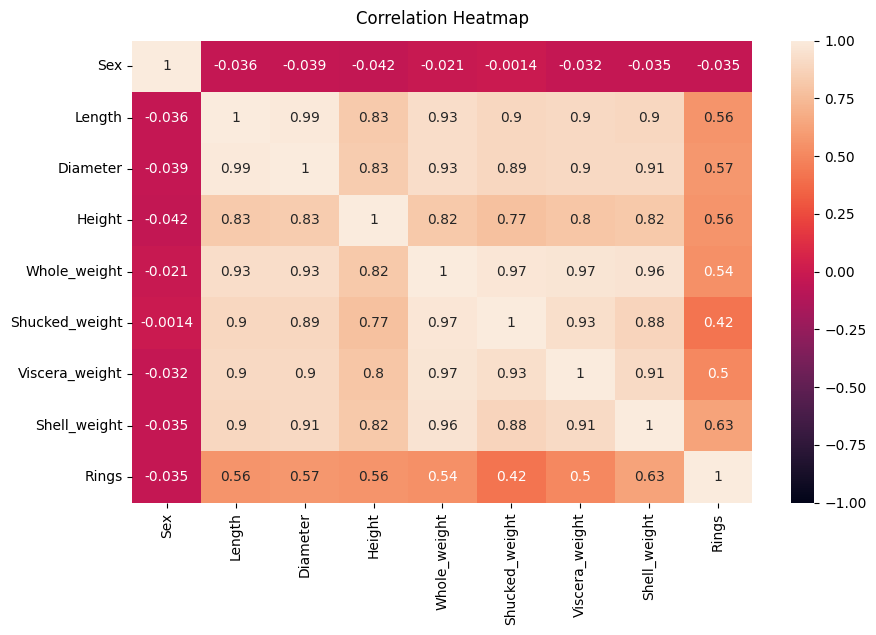

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12); # pad defines the distance of the title from the top of the heatmap.
plt.show()

In [8]:
df.head(1)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


In [9]:
# Approximate volume using length, diameter, and height.
df['Volume'] = df['Length']*df['Height']*df['Diameter']
df.head(1)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Volume
0,2,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,0.015777


In [10]:
# Seperation of features(X) and target(y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
X[:5]

array([[ 2.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,  0.2245,  0.101 ,
         0.15  , 15.    ],
       [ 2.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,  0.0995,  0.0485,
         0.07  ,  7.    ],
       [ 0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,  0.2565,  0.1415,
         0.21  ,  9.    ],
       [ 2.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,  0.2155,  0.114 ,
         0.155 , 10.    ],
       [ 1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,  0.0895,  0.0395,
         0.055 ,  7.    ]])

In [12]:
y[:5]

array([0.01577712, 0.0083475 , 0.030051  , 0.020075  , 0.006732  ])

In [13]:
# Splitting dataset into trainset and testset
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [14]:
X_train.dtype

dtype('float64')

In [15]:
print(f"X_train length: {len(X_train)}")
print(f"X_test length: {len(X_test)}")
print(f"y_train length: {len(y_train)}")
print(f"y_test length: {len(y_test)}")

X_train length: 3341
X_test length: 836
y_train length: 3341
y_test length: 836


In [16]:
print(f"X_train shape: {(X_train.shape)}")
print(f"X_test shape: {(X_test.shape)}")

X_train shape: (3341, 9)
X_test shape: (836, 9)


In [17]:
# # Dimension reduction using PCA
# from  sklearn.decomposition import PCA
# pca = PCA(n_components=6)
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)

In [18]:
print(f"X_train shape: {(X_train.shape)}")
print(f"X_test shape: {(X_test.shape)}")

X_train shape: (3341, 9)
X_test shape: (836, 9)


In [19]:
# Converting these values into tensors
X_train = torch.tensor(X_train).type(torch.float32)
X_test = torch.tensor(X_test).type(torch.float32)
y_train = torch.tensor(y_train).type(torch.float32)
y_test = torch.tensor(y_test).type(torch.float32)

## 3. Model Creation

In [20]:
X_train.shape

torch.Size([3341, 9])

In [21]:
torch.manual_seed(RANDOM_SEED)

# Define the model
class HMRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_stack = nn.Sequential(
        nn.Linear(in_features=X_train.shape[1], out_features=10),
        nn.Linear(in_features=10, out_features=10),
        nn.Linear(in_features=10, out_features=1)
    )

  def forward(self, x):
    return self.linear_stack(x)

In [22]:
# Instantiate the model
model = HMRegression()
model

HMRegression(
  (linear_stack): Sequential(
    (0): Linear(in_features=9, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

## 4. Loss Function & Optimizer Setup

In [23]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

## 5. Training & Testing Loop

In [24]:
torch.manual_seed(RANDOM_SEED)
epochs = 2000
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in tqdm(range(epochs)):
  epoch_count.append(epoch)
  ### Training ###

  # 1. Forward pass
  model.train()
  y_pred = model(X_train)

  # 2. Calculate the loss
  train_loss = loss_fn(y_pred, y_train.unsqueeze(dim=1))
  train_loss_values.append(train_loss)

  # 3. Optimizer zero_grad()
  optimizer.zero_grad()

  # 4. Perform backpropagation
  train_loss.backward()

  # 5. Optimizer step.. (gradient descent)
  optimizer.step()

  ### Testing ###
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test.unsqueeze(dim=1))
    test_loss_values.append(test_loss)

  ### Print Progress ###
  if epoch % 100 == 0:
    print(f"\nEpoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")

  0%|          | 0/2000 [00:00<?, ?it/s]


Epoch: 0 | Train Loss: 0.16450804471969604 | Test Loss: 0.36470726132392883

Epoch: 100 | Train Loss: 0.010641448199748993 | Test Loss: 0.006263009738177061

Epoch: 200 | Train Loss: 0.003896938171237707 | Test Loss: 0.005164113361388445

Epoch: 300 | Train Loss: 0.003983066417276859 | Test Loss: 0.004610157106071711

Epoch: 400 | Train Loss: 0.004149256739765406 | Test Loss: 0.004160026088356972

Epoch: 500 | Train Loss: 0.004029789008200169 | Test Loss: 0.004131114576011896

Epoch: 600 | Train Loss: 0.003685800824314356 | Test Loss: 0.0038211967330425978

Epoch: 700 | Train Loss: 0.003578170668333769 | Test Loss: 0.0036568869836628437

Epoch: 800 | Train Loss: 0.0033508886117488146 | Test Loss: 0.003550512483343482

Epoch: 900 | Train Loss: 0.0032739501912146807 | Test Loss: 0.003474211087450385

Epoch: 1000 | Train Loss: 0.0031144102104008198 | Test Loss: 0.0033354724291712046

Epoch: 1100 | Train Loss: 0.003075802931562066 | Test Loss: 0.0033153120893985033

Epoch: 1200 | Train Lo

## 6. Model Evaluation

In [25]:
# Conversion to ndarray from tensors
epoch_count = torch.tensor(epoch_count).numpy()
train_loss_values = torch.tensor(train_loss_values).numpy()
test_loss_values = torch.tensor(test_loss_values).numpy()

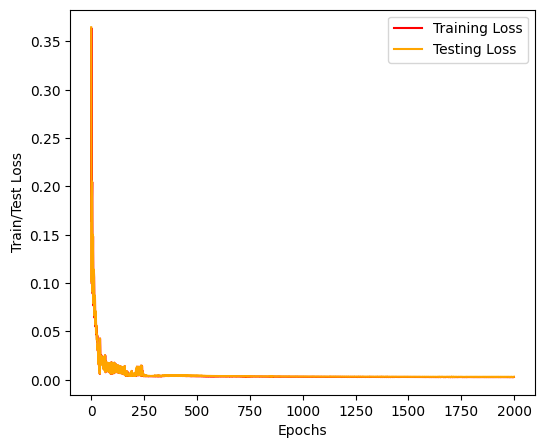

In [26]:
# Plotting Epochs V/S Loss Curve
plt.figure(figsize=(6,5))
plt.plot(epoch_count, train_loss_values, color='red', label='Training Loss')
plt.plot(epoch_count, test_loss_values, color='orange', label='Testing Loss')

plt.xlabel("Epochs")
plt.ylabel("Train/Test Loss")

plt.legend()
plt.show()

In [27]:
# Computing R^2
from sklearn.metrics import r2_score

# Predicting
y_pred = model(X_test)

# Converting to numpy arrays
y_test = y_test.detach().numpy()
y_pred = y_pred.detach().numpy()

# Calculating R^2
r2 = r2_score(y_test, y_pred)

print(f"R2 Value: {r2}")

R2 Value: 0.9572847485542297
